In [1]:
import numpy as np
import imageio
import matplotlib.pyplot as plt
import scipy.ndimage as nd
import math
from skimage.filters import gaussian
from skimage.util import random_noise
from skimage import exposure
from scipy.signal import medfilt2d,convolve

# Peregangan Kontras (revisited)

In [2]:
csr_image = imageio.imread('images/idk.png')

csr_min = csr_image.min()

csr_max = csr_image.max()

csr_m = 255/(csr_max - csr_min)

csr_c = 255-csr_m*csr_max

csr_result = csr_m*csr_image + csr_c

csr_result = csr_result.astype(np.uint8)

# MEnghasilkan historgram dari gambar
hist, bins = np.histogram(csr_image.flatten(),256,[0,256])

Text(0.5, 1.0, 'After histogram')

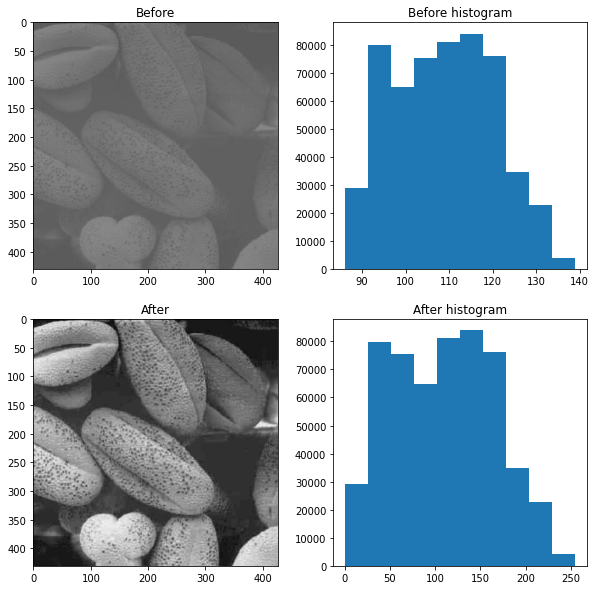

In [3]:
fig, ax = plt.subplots(2,2,figsize=(10,10))
ax[0][0].imshow(csr_image, cmap="gray")
ax[0][0].set_title("Before")
ax[0][1].hist(csr_image.flatten())
ax[0][1].set_title('Before histogram')
ax[1][0].imshow(csr_result, cmap="gray")
ax[1][0].set_title("After")
ax[1][1].hist(csr_result.flatten())
ax[1][1].set_title('After histogram')

# Perataan Histogram

In [5]:
he_image = imageio.imread('images/room.png')

hist, bins = np.histogram(he_image.flatten(),256,[0,256])

# Memberikan nilai kumulatif dari hist
cdf = hist.cumsum()

# Melakukan normalisasi pada interval gambar
cdf_normalized = cdf * hist.max()/ cdf.max()

cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')

he_result = cdf[he_image]

Text(0.5, 1.0, 'After histogram')

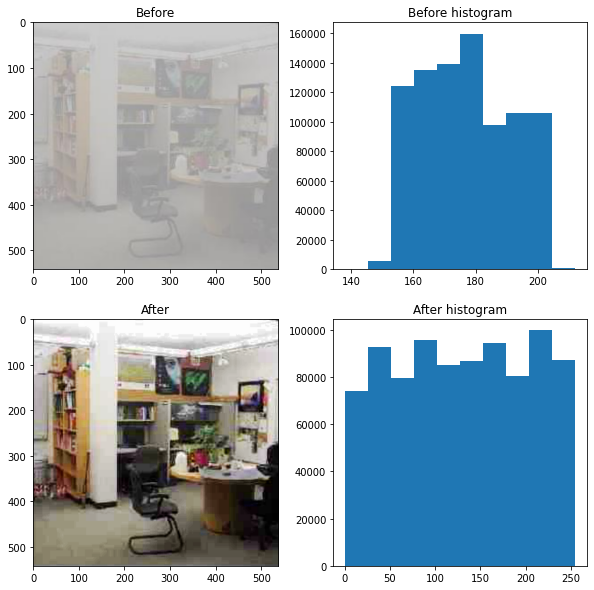

In [6]:
fig, ax = plt.subplots(2,2, figsize=(10,10))
ax[0][0].imshow(he_image)
ax[0][0].set_title("Before")
ax[0][1].hist(he_image.flatten())
ax[0][1].set_title('Before histogram')
ax[1][0].imshow(he_result)
ax[1][0].set_title("After")
ax[1][1].hist(he_result.flatten())
ax[1][1].set_title('After histogram')

# Spefisikasi Histogram / Histogram Matching

In [35]:
source = imageio.imread('images/flower.png')
reference = imageio.imread('images/kid_run.jpg')
multi = True if source.shape[-1] > 1 else False

#Melakukan operasi historgram matching pada gambar source
matched = exposure.match_histograms(source, reference, multichannel=multi)

Text(0.5, 1.0, 'Result')

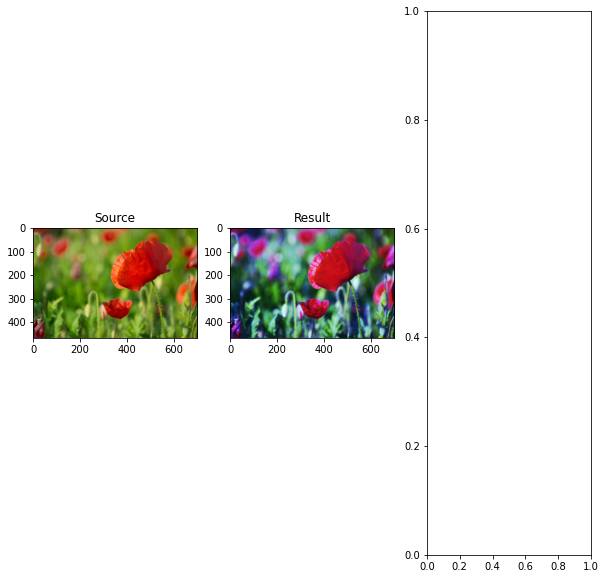

In [37]:
figure, ax = plt.subplots(1,3,figsize=(10,10))
ax[0].imshow(source)
ax[0].set_title('Source')
ax[1].imshow(matched)
ax[1].set_title('Result')

## Operasi AND

In [8]:
andop_image = imageio.imread('images/building.png')

dark_base_image = imageio.imread('images/black_base.png')

light_base_image = imageio.imread('images/light_base.png')

# Melakukan crop pada image (300x245)
andop_image = andop_image[0:300,0:245]
dark_base_image = dark_base_image[0:300,0:245]
ligh_base_image = light_base_image[0:300,0:245]

Text(0.5, 1.0, 'Result')

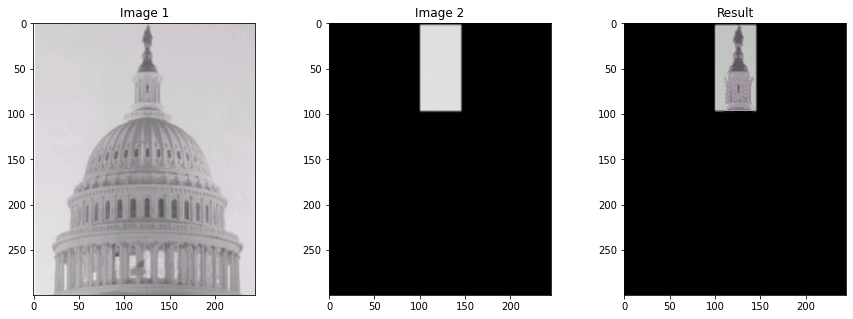

In [9]:
fig, ax = plt.subplots(1,3,figsize=(15,5))
ax[0].imshow(andop_image)
ax[1].imshow(dark_base_image)
# Mencetak hasil operasi and pada gambar
ax[2].imshow(andop_image & dark_base_image)

ax[0].set_title('Image 1')
ax[1].set_title('Image 2')
ax[2].set_title('Result')

## Operasi OR

Text(0.5, 1.0, 'Result')

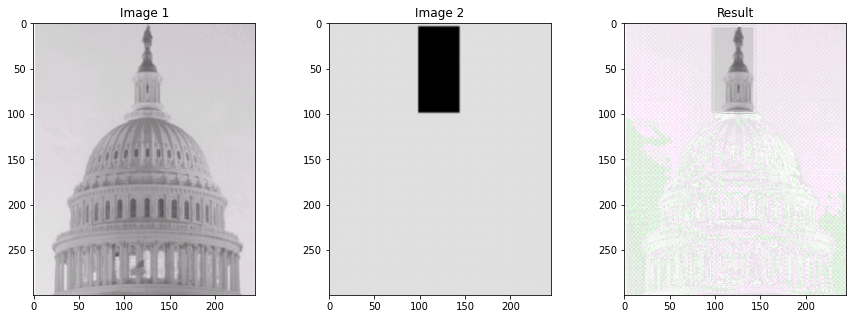

In [10]:
fig, ax = plt.subplots(1,3,figsize=(15,5))
ax[0].imshow(andop_image)
ax[1].imshow(ligh_base_image)
# Mencetak hasil operasi and pada gambar
ax[2].imshow(andop_image | ligh_base_image)
ax[0].set_title('Image 1')
ax[1].set_title('Image 2')
ax[2].set_title('Result')

# Operasi Pengurangan

In [20]:
man_im = imageio.imread('images/man.png')
bg_im = imageio.imread('images/background.png')

substraction_result = np.array(bg_im - man_im)


In [21]:
substraction_result[man_im>bg_im] = 0

Text(0.5, 1.0, 'Result')

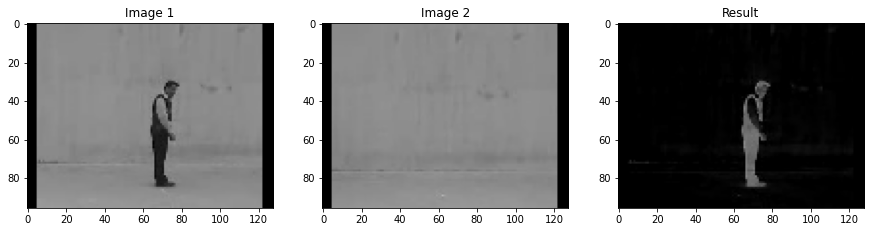

In [23]:
fig, ax = plt.subplots(1,3,figsize=(15,5))
ax[0].imshow(man_im)
ax[1].imshow(bg_im)
ax[2].imshow(substraction_result)
ax[0].set_title('Image 1')
ax[1].set_title('Image 2')
ax[2].set_title('Result')

# Operasi Penjumlahan

In [24]:
# Menghasilkan gambar noise 
def generate_noise_result(image, noise_sample):
    noise_factor = 0.1
    current_amount = 1
    noise_container = []
    
    # Mengubah image dari uint8 menjadi float
    noise_result = np.array(image/255, dtype=float)
    
    # Mengisi container dengan gambar noise
    for i in range(noise_sample):
        noise_container.append(random_noise(image, mode="s&p", amount=current_amount, clip=True))
        current_amount = current_amount - noise_factor
        
    # Menjumlahkan setiap gambar noise
    for i in noise_container:
        noise_result += i
        
    # Membagi gambar dengan jumlah noise yang digunakan
    noise_result=noise_result/(noise_sample+1)
    
    return np.array(255*noise_result, dtype='uint8')
    
            

In [32]:
ori_im = imageio.imread('images/zebra.png')

#Membuat Noise gambar
noise1 = generate_noise_result(ori_im,1)
noise2 = generate_noise_result(ori_im,5)
noise3 = generate_noise_result(ori_im,10)

Text(0.5, 1.0, 'Using 10 noise images')

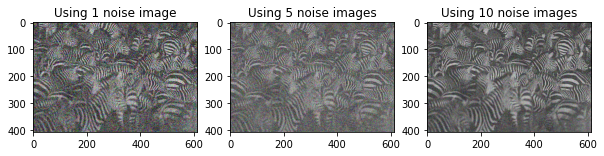

In [33]:
fig, ax = plt.subplots(1,3,figsize=(10,10))
ax[0].imshow(noise1, cmap="gray")
ax[0].set_title('Using 1 noise image')
ax[1].imshow(noise2, cmap="gray")
ax[1].set_title('Using 5 noise images')
ax[2].imshow(noise3, cmap="gray")
ax[2].set_title('Using 10 noise images')

# Operasi Perkalian

In [43]:
shaded_image = imageio.imread('images/walk.png', as_gray=True);
shaded_image = shaded_image[0:568,0:482]

shading_pattern = imageio.imread('images/shading_pattern.png', as_gray=True)
shading_pattern = shading_pattern[0:568,0:482]

texture_appying = shaded_image*shading_pattern

texture_appying = texture_appying/texture_appying.max()

Text(0.5, 1.0, 'Result')

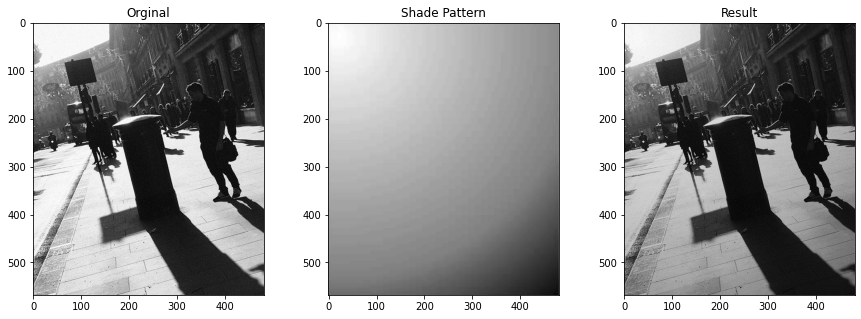

In [44]:
fig, ax = plt.subplots(1,3,figsize=(15,5))
ax[0].imshow(shaded_image, cmap="gray")
ax[0].set_title('Orginal')
ax[1].imshow(shading_pattern, cmap="gray")
ax[1].set_title('Shade Pattern')
ax[2].imshow(texture_appying, cmap='gray')
ax[2].set_title('Result')